<a href="https://colab.research.google.com/github/winstonk6/data_analytics_winter_2022/blob/main/Python/Unit_4_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes 130-US hospitals for years 1999-2008 Data Set#

Data Set Information:

https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes.
Information was extracted from the database for encounters that satisfied the following criteria.


* It is an inpatient encounter (a hospital admission).
* It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

* The length of stay was at least 1 day and at most 14 days.

* Laboratory tests were performed during the encounter.

* Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient,
and emergency visits in the year before the hospitalization, etc.


Using this dataset, we want to see if we can predict whether or not a patient will be readmitted based on certain characteristics.

## Data Exploration (EDA) ##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv')

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


[Text(0.5, 1.0, 'Distribution of Ages')]

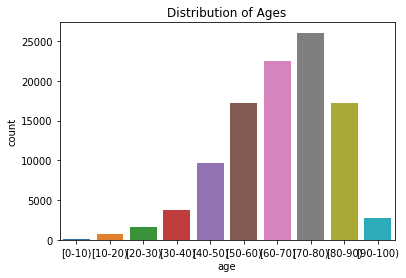

In [ ]:
sns.countplot(data=df, x='age').set(title='Distribution of Ages')

[Text(0.5, 1.0, 'Distribution of Race and Gender')]

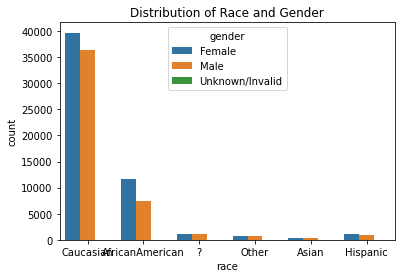

In [ ]:
sns.countplot(data=df, x='race', hue='gender').set(title='Distribution of Race and Gender')

[Text(0.5, 1.0, 'Distribution of Readmitted by Race')]

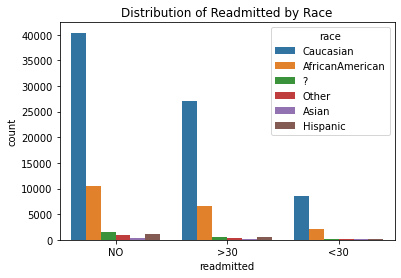

In [ ]:
sns.countplot(data=df, x='readmitted', hue='race').set(title='Distribution of Readmitted by Race')

[Text(0.5, 1.0, 'Distribution of Readmitted by Gender')]

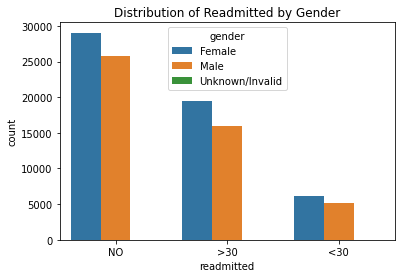

In [ ]:
sns.countplot(data=df, x='readmitted', hue='gender').set(title='Distribution of Readmitted by Gender')

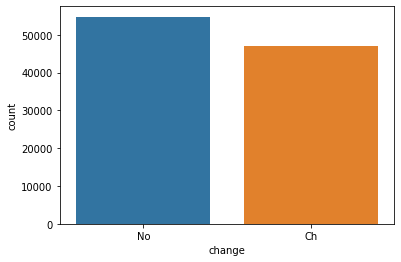

In [ ]:
sns.countplot(data=df, x='change')

## Data Preparation (Wrangling/Cleaning, etc.) ##

Column information:

* Change: any dosage change (increase or reduction) as well as change to a drug with a different generic name.

In [ ]:
df1 = df[['race', 'gender', 'time_in_hospital', 'change', 'readmitted']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   race              101766 non-null  object
 1   gender            101766 non-null  object
 2   time_in_hospital  101766 non-null  int64 
 3   change            101766 non-null  object
 4   readmitted        101766 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.9+ MB


In [ ]:
df1.head()

,race,gender,time_in_hospital,change,readmitted
0,Caucasian,Female,1,No,NO
1,Caucasian,Female,3,Ch,>30
2,AfricanAmerican,Female,2,No,NO
3,Caucasian,Male,2,Ch,NO
4,Caucasian,Male,1,Ch,NO


In [ ]:
# One-hot encode gender and race.
df1 = pd.get_dummies(df1, prefix=['gender'], columns=['gender'])
df1 = pd.get_dummies(df1, prefix=['race'], columns=['race'])

In [ ]:
# Encode change to 0 or 1.
df1['change'].replace({'No': 0, 'Ch': 1}, inplace=True)

In [ ]:
# Change readmitted column to be whether or not the patient was readmitted within 30 days.
df1['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True)
df1.rename(columns={'readmitted': 'early_readmission'}, inplace=True)

In [ ]:
df1.head()

,time_in_hospital,change,early_readmission,gender_Female,gender_Male,gender_Unknown/Invalid,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,1,0,0,1,0,0,0,0,0,1,0,0
1,3,1,0,1,0,0,0,0,0,1,0,0
2,2,0,0,1,0,0,0,1,0,0,0,0
3,2,1,0,0,1,0,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   time_in_hospital        101766 non-null  int64
 1   change                  101766 non-null  int64
 2   early_readmission       101766 non-null  int64
 3   gender_Female           101766 non-null  uint8
 4   gender_Male             101766 non-null  uint8
 5   gender_Unknown/Invalid  101766 non-null  uint8
 6   race_?                  101766 non-null  uint8
 7   race_AfricanAmerican    101766 non-null  uint8
 8   race_Asian              101766 non-null  uint8
 9   race_Caucasian          101766 non-null  uint8
 10  race_Hispanic           101766 non-null  uint8
 11  race_Other              101766 non-null  uint8
dtypes: int64(3), uint8(9)
memory usage: 3.2 MB


## Build + Evaluate Models ##

### Logistic Regression ###

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['early_readmission'], axis = 1), df1['early_readmission'], test_size = .3, random_state = 100)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, log_reg_pred))

[[27168     0]
 [ 3362     0]]


In [ ]:
log_reg.score(X_test, y_test)

0.8898788077301015

### KNN ###

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, knn_pred))

[[27168     0]
 [ 3362     0]]


In [ ]:
knn.score(X_test, y_test)

0.8898788077301015